In [ ]:
# > /dev/null 2>&1 silences output
!pip install box2d-py #> /dev/null 2>&1
!pip install gym pyvirtualdisplay
!apt-get install -y xvfb python-opengl ffmpeg
!apt-get install x11-utils
!apt-get install python-opengl
!apt-get install xvfb


     |████████████████████████████████| 450kB 347kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl xvfb
0 upgraded, 2 newly installed, 0 to remove and 25 not upgraded.
Need to get 1,280 kB of archives.
After this operation, 7,682 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.4 [784 kB]
Fetched 1,280 kB in 0s (9,847 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 144542 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Selecting previously unselected package

In [ ]:
#!pip install pyvirtualdisplay

In [ ]:
# import necessary packages, install some if needed
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
from google.colab import files
from datetime import datetime
import time
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
import math
import glob
import io
import base64
from IPython.display import HTML


#eg screen resolution 1400x900
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

# Custom functions for visualization and creating environments in colab 
# https://star-ai.github.io/Rendering-OpenAi-Gym-in-Colaboratory/?fbclid=IwAR2y2gSNQv6tQag9JorgnG-O3J5Rx-QJLqK9lbEv9MSZcdt-YroXFzv0VU4

import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [ ]:
# mount colab to google drive, access to write and read files
# needs authorization first, go to url and enter code

#If not yet mounted, uncomment these
from google.colab import drive
drive.mount('/content/gdrive)

SyntaxError: ignored

'Cartpole Machine Learning Project.ipynb'  'Mountain run 4'
 DQNdata				   'Mountain Run Q Learning.ipynb'
'DQN Project.ipynb'			    PT202001
'Machine Learning Project.ipynb'	    PT202002
'Mountain run 1'			    qtables
'Mountain run 2'			   'Sentdex DQN Tutorial.ipynb'
'Mountain run 3 gran'			   'Sentdex Q Learning Tutorial.ipynb'


In [ ]:
# Hyperparameters and other definitions

# Get folder path to save files inside drive
!ls "/content/gdrive/My Drive/Colab Notebooks"
root_dir = "/content/gdrive/My Drive/Colab Notebooks/"
drive_path = root_dir + "OW_ML/"
model_name = "OW_ML"

# Import a model to expand training
USE_PREV_MODEL = False
if USE_PREV_MODEL:
  root_dir = "/content/gdrive/My Drive/Colab Notebooks/"
  model_path = root_dir + "PT202004/PT202004episode30000-qtable.npy"
  q_table = np.load(model_path)

LEARNING_RATE = 0.2
DISCOUNT = 0.995
EPISODES = 1_000

SAVE_RESULTS = True
SHOW_EVERY = 9900
STATS_EVERY = 100
ep_rewards = []
changed_eps= {'ep': [], 'eps': []}
aggr_ep_rewards = {'ep': [], 'avg': [], 'max': [], 'min': []}

# Create and reset game environment
env = wrap_env(gym.make("MountainCar-v0"))
#print(env.observation_space.high, env.observation_space.low)

# Discretize the states, so we don't have an enormous continuous q table
DISCRETE_OS_SIZE = [40] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_OS_SIZE
#print(discrete_os_win_size)

# function to get the transformed discretized state from game states
def get_discrete_state(state):
  discrete_state = (state - env.observation_space.low)/discrete_os_win_size
  return tuple(discrete_state.astype(np.int))

if not USE_PREV_MODEL:
  # Initialize q table, random numbers
  q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))  #np.shape(q_table)
  # Formula for updating q values : new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
  print("q table initialized at:", datetime.now().strftime("%d_%m_%Y.%Hh%M"))

# Exploration settings, decide whether to use learned q table (exploitation) or randomize movement (exploration)
epsilon = 1  # not a constant, qoing to be decayed
epsilon_decay_value = 0.999
min_epsilon = 0.01
#START_EPSILON_DECAYING = 1
#END_EPSILON_DECAYING = EPISODES//2
#epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)
#print(END_EPSILON_DECAYING, epsilon_decay_value, DISCOUNT, LEARNING_RATE)


 Untitled0.ipynb  'Worksheet 4, Deep Learning.ipynb'
q table initialized at: 26_03_2020.15h05


  0%|          | 98/30000 [00:14<19:22, 25.73it/s]

Episode:   100, average reward: -200.0, current epsilon: 0.90


  1%|          | 206/30000 [00:19<12:26, 39.91it/s]

Episode:   200, average reward: -200.0, current epsilon: 0.82


  1%|          | 306/30000 [00:23<13:52, 35.68it/s]

Episode:   300, average reward: -200.0, current epsilon: 0.74


  1%|▏         | 407/30000 [00:28<13:14, 37.26it/s]

Episode:   400, average reward: -200.0, current epsilon: 0.67


  2%|▏         | 506/30000 [00:31<15:09, 32.45it/s]

Episode:   500, average reward: -200.0, current epsilon: 0.61


  2%|▏         | 606/30000 [00:36<13:35, 36.06it/s]

Episode:   600, average reward: -200.0, current epsilon: 0.55


  2%|▏         | 705/30000 [00:38<12:57, 37.66it/s]

Episode:   700, average reward: -200.0, current epsilon: 0.50


  3%|▎         | 803/30000 [00:43<13:09, 36.97it/s]

Episode:   800, average reward: -200.0, current epsilon: 0.45


  3%|▎         | 908/30000 [00:46<12:16, 39.51it/s]

Episode:   900, average reward: -200.0, current epsilon: 0.41


  3%|▎         | 997/30000 [00:48<11:33, 41.80it/s]

Episode:  1000, average reward: -200.0, current epsilon: 0.37


  4%|▎         | 1106/30000 [00:53<11:37, 41.41it/s]

Episode:  1100, average reward: -200.0, current epsilon: 0.33


  4%|▍         | 1204/30000 [00:55<12:40, 37.85it/s]

Episode:  1200, average reward: -200.0, current epsilon: 0.30


  4%|▍         | 1308/30000 [00:58<12:27, 38.39it/s]

Episode:  1300, average reward: -200.0, current epsilon: 0.27


  5%|▍         | 1407/30000 [01:01<13:38, 34.91it/s]

Episode:  1400, average reward: -199.7, current epsilon: 0.25


  5%|▌         | 1505/30000 [01:04<13:23, 35.48it/s]

Episode:  1500, average reward: -200.0, current epsilon: 0.22


  5%|▌         | 1606/30000 [01:06<13:56, 33.93it/s]

Episode:  1600, average reward: -200.0, current epsilon: 0.20


  6%|▌         | 1707/30000 [01:09<13:28, 35.01it/s]

Episode:  1700, average reward: -199.7, current epsilon: 0.18


  6%|▌         | 1806/30000 [01:12<13:46, 34.10it/s]

Episode:  1800, average reward: -199.8, current epsilon: 0.17


  6%|▋         | 1906/30000 [01:15<14:15, 32.86it/s]

Episode:  1900, average reward: -199.4, current epsilon: 0.15


  7%|▋         | 2000/30000 [01:18<12:41, 36.76it/s]

Episode:  2000, average reward: -199.7, current epsilon: 0.14


  7%|▋         | 2108/30000 [01:23<13:23, 34.69it/s]

Episode:  2100, average reward: -197.0, current epsilon: 0.12


  7%|▋         | 2205/30000 [01:25<10:10, 45.49it/s]

Episode:  2200, average reward: -194.9, current epsilon: 0.11


  8%|▊         | 2307/30000 [01:27<12:45, 36.20it/s]

Episode:  2300, average reward: -199.8, current epsilon: 0.10


  8%|▊         | 2405/30000 [01:30<13:56, 32.98it/s]

Episode:  2400, average reward: -199.5, current epsilon: 0.09


  8%|▊         | 2505/30000 [01:33<11:36, 39.50it/s]

Episode:  2500, average reward: -189.5, current epsilon: 0.08


  9%|▊         | 2607/30000 [01:35<10:27, 43.68it/s]

Episode:  2600, average reward: -195.4, current epsilon: 0.07


  9%|▉         | 2707/30000 [01:37<10:13, 44.52it/s]

Episode:  2700, average reward: -195.2, current epsilon: 0.07


  9%|▉         | 2808/30000 [01:39<09:54, 45.71it/s]

Episode:  2800, average reward: -189.0, current epsilon: 0.06


 10%|▉         | 2906/30000 [01:42<11:13, 40.23it/s]

Episode:  2900, average reward: -184.1, current epsilon: 0.05


 10%|▉         | 2997/30000 [01:44<13:01, 34.55it/s]

Episode:  3000, average reward: -189.7, current epsilon: 0.05


 10%|█         | 3108/30000 [01:49<09:35, 46.74it/s]

Episode:  3100, average reward: -186.7, current epsilon: 0.04


 11%|█         | 3208/30000 [01:51<08:52, 50.35it/s]

Episode:  3200, average reward: -177.8, current epsilon: 0.04


 11%|█         | 3307/30000 [01:53<10:01, 44.34it/s]

Episode:  3300, average reward: -179.0, current epsilon: 0.04


 11%|█▏        | 3405/30000 [01:55<09:07, 48.60it/s]

Episode:  3400, average reward: -176.5, current epsilon: 0.03


 12%|█▏        | 3506/30000 [01:57<11:28, 38.48it/s]

Episode:  3500, average reward: -171.5, current epsilon: 0.03


 12%|█▏        | 3607/30000 [02:00<10:02, 43.78it/s]

Episode:  3600, average reward: -174.1, current epsilon: 0.03


 12%|█▏        | 3706/30000 [02:02<11:07, 39.39it/s]

Episode:  3700, average reward: -177.1, current epsilon: 0.02


 13%|█▎        | 3805/30000 [02:05<11:28, 38.03it/s]

Episode:  3800, average reward: -177.0, current epsilon: 0.02


 13%|█▎        | 3905/30000 [02:07<09:02, 48.13it/s]

Episode:  3900, average reward: -174.7, current epsilon: 0.02


 13%|█▎        | 3996/30000 [02:09<08:06, 53.48it/s]

Episode:  4000, average reward: -178.3, current epsilon: 0.02


 14%|█▎        | 4104/30000 [02:12<08:24, 51.35it/s]

Episode:  4100, average reward: -169.5, current epsilon: 0.02


 14%|█▍        | 4207/30000 [02:15<11:07, 38.62it/s]

Episode:  4200, average reward: -169.1, current epsilon: 0.01


 14%|█▍        | 4307/30000 [02:17<09:37, 44.51it/s]

Episode:  4300, average reward: -170.1, current epsilon: 0.01


 15%|█▍        | 4406/30000 [02:19<11:14, 37.94it/s]

Episode:  4400, average reward: -171.8, current epsilon: 0.01


 15%|█▌        | 4505/30000 [02:22<10:53, 39.02it/s]

Episode:  4500, average reward: -169.0, current epsilon: 0.01


 15%|█▌        | 4606/30000 [02:24<11:42, 36.12it/s]

Episode:  4600, average reward: -170.5, current epsilon: 0.01


 16%|█▌        | 4704/30000 [02:27<10:03, 41.90it/s]

Episode:  4700, average reward: -169.9, current epsilon: 0.01


 16%|█▌        | 4807/30000 [02:29<09:32, 44.02it/s]

Episode:  4800, average reward: -170.0, current epsilon: 0.01


 16%|█▋        | 4908/30000 [02:31<09:30, 43.99it/s]

Episode:  4900, average reward: -169.1, current epsilon: 0.01


 17%|█▋        | 4997/30000 [02:33<09:51, 42.28it/s]

Episode:  5000, average reward: -168.0, current epsilon: 0.01


 17%|█▋        | 5110/30000 [02:37<09:00, 46.06it/s]

Episode:  5100, average reward: -167.5, current epsilon: 0.01


 17%|█▋        | 5208/30000 [02:39<07:37, 54.15it/s]

Episode:  5200, average reward: -168.5, current epsilon: 0.01


 18%|█▊        | 5305/30000 [02:41<07:20, 56.01it/s]

Episode:  5300, average reward: -168.3, current epsilon: 0.01


 18%|█▊        | 5409/30000 [02:43<07:20, 55.84it/s]

Episode:  5400, average reward: -169.0, current epsilon: 0.01


 18%|█▊        | 5506/30000 [02:46<08:33, 47.71it/s]

Episode:  5500, average reward: -169.9, current epsilon: 0.01


 19%|█▊        | 5604/30000 [02:48<07:39, 53.12it/s]

Episode:  5600, average reward: -169.3, current epsilon: 0.01


 19%|█▉        | 5705/30000 [02:50<09:04, 44.60it/s]

Episode:  5700, average reward: -168.6, current epsilon: 0.01


 19%|█▉        | 5811/30000 [02:52<08:02, 50.09it/s]

Episode:  5800, average reward: -169.2, current epsilon: 0.01


 20%|█▉        | 5909/30000 [02:54<07:30, 53.42it/s]

Episode:  5900, average reward: -167.2, current epsilon: 0.01


 20%|█▉        | 5999/30000 [02:55<07:18, 54.75it/s]

Episode:  6000, average reward: -167.5, current epsilon: 0.01


 20%|██        | 6109/30000 [03:00<08:30, 46.77it/s]

Episode:  6100, average reward: -168.0, current epsilon: 0.01


 21%|██        | 6206/30000 [03:02<10:29, 37.80it/s]

Episode:  6200, average reward: -169.4, current epsilon: 0.01


 21%|██        | 6308/30000 [03:04<08:45, 45.10it/s]

Episode:  6300, average reward: -169.8, current epsilon: 0.01


 21%|██▏       | 6405/30000 [03:06<08:45, 44.89it/s]

Episode:  6400, average reward: -168.9, current epsilon: 0.01


 22%|██▏       | 6504/30000 [03:09<09:25, 41.54it/s]

Episode:  6500, average reward: -172.1, current epsilon: 0.01


 22%|██▏       | 6608/30000 [03:11<09:22, 41.59it/s]

Episode:  6600, average reward: -168.6, current epsilon: 0.01


 22%|██▏       | 6706/30000 [03:14<09:10, 42.29it/s]

Episode:  6700, average reward: -171.3, current epsilon: 0.01


 23%|██▎       | 6805/30000 [03:16<08:51, 43.68it/s]

Episode:  6800, average reward: -169.1, current epsilon: 0.01


 23%|██▎       | 6905/30000 [03:18<08:38, 44.56it/s]

Episode:  6900, average reward: -166.9, current epsilon: 0.01


 23%|██▎       | 6997/30000 [03:20<08:33, 44.76it/s]

Episode:  7000, average reward: -164.9, current epsilon: 0.01


 24%|██▎       | 7110/30000 [03:24<08:08, 46.86it/s]

Episode:  7100, average reward: -166.6, current epsilon: 0.01


 24%|██▍       | 7209/30000 [03:26<09:28, 40.06it/s]

Episode:  7200, average reward: -167.4, current epsilon: 0.01


 24%|██▍       | 7302/30000 [03:29<09:36, 39.36it/s]

Episode:  7300, average reward: -166.8, current epsilon: 0.01


 25%|██▍       | 7408/30000 [03:31<09:32, 39.47it/s]

Episode:  7400, average reward: -167.0, current epsilon: 0.01


 25%|██▌       | 7509/30000 [03:33<08:10, 45.86it/s]

Episode:  7500, average reward: -167.5, current epsilon: 0.01


 25%|██▌       | 7608/30000 [03:36<08:43, 42.79it/s]

Episode:  7600, average reward: -165.3, current epsilon: 0.01


 26%|██▌       | 7700/30000 [03:38<07:20, 50.59it/s]

Episode:  7700, average reward: -164.7, current epsilon: 0.01


 26%|██▌       | 7805/30000 [03:40<06:54, 53.59it/s]

Episode:  7800, average reward: -165.7, current epsilon: 0.01


 26%|██▋       | 7904/30000 [03:42<07:19, 50.30it/s]

Episode:  7900, average reward: -167.5, current epsilon: 0.01


 27%|██▋       | 7997/30000 [03:44<06:49, 53.79it/s]

Episode:  8000, average reward: -165.4, current epsilon: 0.01


 27%|██▋       | 8106/30000 [03:47<07:14, 50.43it/s]

Episode:  8100, average reward: -166.2, current epsilon: 0.01


 27%|██▋       | 8209/30000 [03:50<08:17, 43.78it/s]

Episode:  8200, average reward: -165.8, current epsilon: 0.01


 28%|██▊       | 8304/30000 [03:52<07:43, 46.81it/s]

Episode:  8300, average reward: -165.0, current epsilon: 0.01


 28%|██▊       | 8408/30000 [03:54<07:37, 47.24it/s]

Episode:  8400, average reward: -165.9, current epsilon: 0.01


 28%|██▊       | 8502/30000 [03:56<06:59, 51.25it/s]

Episode:  8500, average reward: -167.2, current epsilon: 0.01


 29%|██▊       | 8607/30000 [03:59<08:22, 42.58it/s]

Episode:  8600, average reward: -165.6, current epsilon: 0.01


 29%|██▉       | 8707/30000 [04:01<07:58, 44.47it/s]

Episode:  8700, average reward: -168.1, current epsilon: 0.01


 29%|██▉       | 8805/30000 [04:04<07:48, 45.22it/s]

Episode:  8800, average reward: -167.0, current epsilon: 0.01


 30%|██▉       | 8908/30000 [04:06<07:52, 44.61it/s]

Episode:  8900, average reward: -163.4, current epsilon: 0.01


 30%|██▉       | 8995/30000 [04:08<06:37, 52.89it/s]

Episode:  9000, average reward: -163.2, current epsilon: 0.01


 30%|███       | 9110/30000 [04:12<07:27, 46.72it/s]

Episode:  9100, average reward: -164.0, current epsilon: 0.01


 31%|███       | 9205/30000 [04:14<07:37, 45.47it/s]

Episode:  9200, average reward: -165.3, current epsilon: 0.01


 31%|███       | 9305/30000 [04:16<08:13, 41.96it/s]

Episode:  9300, average reward: -164.5, current epsilon: 0.01


 31%|███▏      | 9406/30000 [04:19<07:08, 48.07it/s]

Episode:  9400, average reward: -169.6, current epsilon: 0.01


 32%|███▏      | 9509/30000 [04:21<06:22, 53.55it/s]

Episode:  9500, average reward: -167.5, current epsilon: 0.01


 32%|███▏      | 9609/30000 [04:23<07:26, 45.64it/s]

Episode:  9600, average reward: -166.5, current epsilon: 0.01


 32%|███▏      | 9705/30000 [04:25<08:31, 39.64it/s]

Episode:  9700, average reward: -162.1, current epsilon: 0.01


 33%|███▎      | 9809/30000 [04:27<06:06, 55.07it/s]

Episode:  9800, average reward: -164.4, current epsilon: 0.01


 33%|███▎      | 9907/30000 [04:30<10:57, 30.57it/s]

Episode:  9900, average reward: -163.6, current epsilon: 0.01


 33%|███▎      | 9998/30000 [04:32<07:52, 42.32it/s]

Episode: 10000, average reward: -165.9, current epsilon: 0.01


 34%|███▎      | 10103/30000 [04:37<13:12, 25.11it/s]

Episode: 10100, average reward: -165.9, current epsilon: 0.01


 34%|███▍      | 10209/30000 [04:39<06:10, 53.44it/s]

Episode: 10200, average reward: -162.5, current epsilon: 0.01


 34%|███▍      | 10305/30000 [04:41<07:59, 41.04it/s]

Episode: 10300, average reward: -161.7, current epsilon: 0.01


 35%|███▍      | 10408/30000 [04:43<08:36, 37.91it/s]

Episode: 10400, average reward: -162.2, current epsilon: 0.01


 35%|███▌      | 10502/30000 [04:45<06:31, 49.80it/s]

Episode: 10500, average reward: -161.1, current epsilon: 0.01


 35%|███▌      | 10605/30000 [04:47<06:36, 48.93it/s]

Episode: 10600, average reward: -161.5, current epsilon: 0.01


 36%|███▌      | 10706/30000 [04:50<07:20, 43.78it/s]

Episode: 10700, average reward: -162.1, current epsilon: 0.01


 36%|███▌      | 10805/30000 [04:52<07:15, 44.08it/s]

Episode: 10800, average reward: -160.1, current epsilon: 0.01


 36%|███▋      | 10906/30000 [04:55<07:06, 44.72it/s]

Episode: 10900, average reward: -160.1, current epsilon: 0.01


 37%|███▋      | 10996/30000 [04:57<06:47, 46.61it/s]

Episode: 11000, average reward: -161.8, current epsilon: 0.01


 37%|███▋      | 11107/30000 [05:00<07:16, 43.32it/s]

Episode: 11100, average reward: -159.5, current epsilon: 0.01


 37%|███▋      | 11205/30000 [05:03<08:07, 38.53it/s]

Episode: 11200, average reward: -162.9, current epsilon: 0.01


 38%|███▊      | 11308/30000 [05:05<05:43, 54.38it/s]

Episode: 11300, average reward: -163.7, current epsilon: 0.01


 38%|███▊      | 11405/30000 [05:07<06:05, 50.87it/s]

Episode: 11400, average reward: -160.2, current epsilon: 0.01


 38%|███▊      | 11505/30000 [05:09<07:19, 42.08it/s]

Episode: 11500, average reward: -160.3, current epsilon: 0.01


 39%|███▊      | 11605/30000 [05:11<05:58, 51.36it/s]

Episode: 11600, average reward: -161.6, current epsilon: 0.01


 39%|███▉      | 11706/30000 [05:13<07:25, 41.10it/s]

Episode: 11700, average reward: -161.1, current epsilon: 0.01


 39%|███▉      | 11805/30000 [05:15<06:42, 45.24it/s]

Episode: 11800, average reward: -160.7, current epsilon: 0.01


 40%|███▉      | 11907/30000 [05:18<05:26, 55.33it/s]

Episode: 11900, average reward: -161.3, current epsilon: 0.01


 40%|███▉      | 11999/30000 [05:19<06:50, 43.81it/s]

Episode: 12000, average reward: -161.0, current epsilon: 0.01


 40%|████      | 12107/30000 [05:23<07:34, 39.39it/s]

Episode: 12100, average reward: -173.3, current epsilon: 0.01


 41%|████      | 12204/30000 [05:26<07:13, 41.03it/s]

Episode: 12200, average reward: -177.7, current epsilon: 0.01


 41%|████      | 12305/30000 [05:29<08:17, 35.58it/s]

Episode: 12300, average reward: -176.8, current epsilon: 0.01


 41%|████▏     | 12404/30000 [05:31<08:58, 32.70it/s]

Episode: 12400, average reward: -180.5, current epsilon: 0.01


 42%|████▏     | 12506/30000 [05:34<08:45, 33.32it/s]

Episode: 12500, average reward: -177.6, current epsilon: 0.01


 42%|████▏     | 12608/30000 [05:37<06:42, 43.18it/s]

Episode: 12600, average reward: -178.8, current epsilon: 0.01


 42%|████▏     | 12707/30000 [05:39<07:01, 41.00it/s]

Episode: 12700, average reward: -180.9, current epsilon: 0.01


 43%|████▎     | 12808/30000 [05:42<06:51, 41.75it/s]

Episode: 12800, average reward: -180.7, current epsilon: 0.01


 43%|████▎     | 12906/30000 [05:44<07:33, 37.67it/s]

Episode: 12900, average reward: -175.8, current epsilon: 0.01


 43%|████▎     | 12997/30000 [05:47<07:24, 38.28it/s]

Episode: 13000, average reward: -167.5, current epsilon: 0.01


 44%|████▎     | 13105/30000 [05:51<08:01, 35.05it/s]

Episode: 13100, average reward: -166.5, current epsilon: 0.01


 44%|████▍     | 13204/30000 [05:53<06:45, 41.43it/s]

Episode: 13200, average reward: -170.0, current epsilon: 0.01


 44%|████▍     | 13305/30000 [05:55<06:15, 44.52it/s]

Episode: 13300, average reward: -176.8, current epsilon: 0.01


 45%|████▍     | 13408/30000 [05:58<05:25, 50.92it/s]

Episode: 13400, average reward: -173.5, current epsilon: 0.01


 45%|████▌     | 13505/30000 [05:59<05:01, 54.66it/s]

Episode: 13500, average reward: -169.5, current epsilon: 0.01


 45%|████▌     | 13608/30000 [06:01<05:18, 51.53it/s]

Episode: 13600, average reward: -168.6, current epsilon: 0.01


 46%|████▌     | 13710/30000 [06:03<05:02, 53.84it/s]

Episode: 13700, average reward: -171.8, current epsilon: 0.01


 46%|████▌     | 13807/30000 [06:05<05:34, 48.35it/s]

Episode: 13800, average reward: -171.2, current epsilon: 0.01


 46%|████▋     | 13908/30000 [06:07<05:21, 50.09it/s]

Episode: 13900, average reward: -172.5, current epsilon: 0.01


 47%|████▋     | 13998/30000 [06:09<05:15, 50.65it/s]

Episode: 14000, average reward: -176.0, current epsilon: 0.01


 47%|████▋     | 14109/30000 [06:13<05:32, 47.81it/s]

Episode: 14100, average reward: -179.1, current epsilon: 0.01


 47%|████▋     | 14207/30000 [06:15<05:13, 50.36it/s]

Episode: 14200, average reward: -181.0, current epsilon: 0.01


 48%|████▊     | 14310/30000 [06:17<05:15, 49.70it/s]

Episode: 14300, average reward: -173.6, current epsilon: 0.01


 48%|████▊     | 14409/30000 [06:19<05:59, 43.40it/s]

Episode: 14400, average reward: -178.1, current epsilon: 0.01


 48%|████▊     | 14505/30000 [06:22<05:25, 47.65it/s]

Episode: 14500, average reward: -177.5, current epsilon: 0.01


 49%|████▊     | 14608/30000 [06:24<05:34, 46.05it/s]

Episode: 14600, average reward: -165.2, current epsilon: 0.01


 49%|████▉     | 14706/30000 [06:25<04:31, 56.23it/s]

Episode: 14700, average reward: -162.0, current epsilon: 0.01


 49%|████▉     | 14811/30000 [06:27<04:23, 57.64it/s]

Episode: 14800, average reward: -158.7, current epsilon: 0.01


 50%|████▉     | 14906/30000 [06:29<04:23, 57.34it/s]

Episode: 14900, average reward: -160.4, current epsilon: 0.01


 50%|████▉     | 14996/30000 [06:30<04:14, 58.95it/s]

Episode: 15000, average reward: -152.0, current epsilon: 0.01


 50%|█████     | 15110/30000 [06:34<05:08, 48.22it/s]

Episode: 15100, average reward: -152.9, current epsilon: 0.01


 51%|█████     | 15211/30000 [06:37<05:17, 46.56it/s]

Episode: 15200, average reward: -152.1, current epsilon: 0.01


 51%|█████     | 15306/30000 [06:38<04:06, 59.68it/s]

Episode: 15300, average reward: -154.8, current epsilon: 0.01


 51%|█████▏    | 15410/30000 [06:40<04:11, 58.00it/s]

Episode: 15400, average reward: -153.4, current epsilon: 0.01


 52%|█████▏    | 15509/30000 [06:42<04:23, 55.03it/s]

Episode: 15500, average reward: -154.4, current epsilon: 0.01


 52%|█████▏    | 15608/30000 [06:43<04:06, 58.42it/s]

Episode: 15600, average reward: -154.0, current epsilon: 0.01


 52%|█████▏    | 15711/30000 [06:45<04:03, 58.80it/s]

Episode: 15700, average reward: -154.2, current epsilon: 0.01


 53%|█████▎    | 15810/30000 [06:47<03:59, 59.35it/s]

Episode: 15800, average reward: -154.6, current epsilon: 0.01


 53%|█████▎    | 15908/30000 [06:48<03:54, 60.06it/s]

Episode: 15900, average reward: -154.3, current epsilon: 0.01


 53%|█████▎    | 15998/30000 [06:50<03:47, 61.42it/s]

Episode: 16000, average reward: -154.5, current epsilon: 0.01


 54%|█████▎    | 16099/30000 [06:53<03:57, 58.53it/s]

Episode: 16100, average reward: -154.7, current epsilon: 0.01


 54%|█████▍    | 16208/30000 [06:55<04:55, 46.64it/s]

Episode: 16200, average reward: -155.2, current epsilon: 0.01


 54%|█████▍    | 16307/30000 [06:57<05:20, 42.67it/s]

Episode: 16300, average reward: -153.6, current epsilon: 0.01


 55%|█████▍    | 16408/30000 [06:59<03:53, 58.10it/s]

Episode: 16400, average reward: -155.9, current epsilon: 0.01


 55%|█████▌    | 16510/30000 [07:01<04:12, 53.36it/s]

Episode: 16500, average reward: -156.2, current epsilon: 0.01


 55%|█████▌    | 16609/30000 [07:03<03:44, 59.59it/s]

Episode: 16600, average reward: -156.0, current epsilon: 0.01


 56%|█████▌    | 16707/30000 [07:05<03:42, 59.84it/s]

Episode: 16700, average reward: -156.8, current epsilon: 0.01


 56%|█████▌    | 16810/30000 [07:07<03:53, 56.54it/s]

Episode: 16800, average reward: -155.7, current epsilon: 0.01


 56%|█████▋    | 16907/30000 [07:08<03:34, 60.96it/s]

Episode: 16900, average reward: -154.7, current epsilon: 0.01


 57%|█████▋    | 16999/30000 [07:10<03:41, 58.74it/s]

Episode: 17000, average reward: -154.6, current epsilon: 0.01


 57%|█████▋    | 17106/30000 [07:13<04:15, 50.49it/s]

Episode: 17100, average reward: -155.8, current epsilon: 0.01


 57%|█████▋    | 17208/30000 [07:15<03:36, 59.06it/s]

Episode: 17200, average reward: -156.6, current epsilon: 0.01


 58%|█████▊    | 17308/30000 [07:17<04:25, 47.78it/s]

Episode: 17300, average reward: -155.0, current epsilon: 0.01


 58%|█████▊    | 17406/30000 [07:19<03:37, 57.84it/s]

Episode: 17400, average reward: -153.5, current epsilon: 0.01


 58%|█████▊    | 17511/30000 [07:21<03:34, 58.26it/s]

Episode: 17500, average reward: -157.8, current epsilon: 0.01


 59%|█████▊    | 17601/30000 [07:23<04:54, 42.03it/s]

Episode: 17600, average reward: -155.9, current epsilon: 0.01


 59%|█████▉    | 17705/30000 [07:24<03:40, 55.66it/s]

Episode: 17700, average reward: -154.8, current epsilon: 0.01


 59%|█████▉    | 17811/30000 [07:26<03:28, 58.59it/s]

Episode: 17800, average reward: -153.5, current epsilon: 0.01


 60%|█████▉    | 17907/30000 [07:28<03:19, 60.48it/s]

Episode: 17900, average reward: -153.6, current epsilon: 0.01


 60%|█████▉    | 17997/30000 [07:29<03:05, 64.54it/s]

Episode: 18000, average reward: -153.3, current epsilon: 0.01


 60%|██████    | 18109/30000 [07:34<04:13, 46.88it/s]

Episode: 18100, average reward: -153.5, current epsilon: 0.01


 61%|██████    | 18208/30000 [07:36<04:57, 39.69it/s]

Episode: 18200, average reward: -152.2, current epsilon: 0.01


 61%|██████    | 18305/30000 [07:38<03:43, 52.24it/s]

Episode: 18300, average reward: -153.3, current epsilon: 0.01


 61%|██████▏   | 18408/30000 [07:40<03:46, 51.10it/s]

Episode: 18400, average reward: -150.5, current epsilon: 0.01


 62%|██████▏   | 18506/30000 [07:42<04:23, 43.59it/s]

Episode: 18500, average reward: -150.1, current epsilon: 0.01


 62%|██████▏   | 18605/30000 [07:44<04:43, 40.15it/s]

Episode: 18600, average reward: -152.5, current epsilon: 0.01


 62%|██████▏   | 18707/30000 [07:46<04:37, 40.73it/s]

Episode: 18700, average reward: -154.2, current epsilon: 0.01


 63%|██████▎   | 18807/30000 [07:48<03:25, 54.54it/s]

Episode: 18800, average reward: -150.6, current epsilon: 0.01


 63%|██████▎   | 18906/30000 [07:50<03:59, 46.25it/s]

Episode: 18900, average reward: -151.4, current epsilon: 0.01


 63%|██████▎   | 18995/30000 [07:52<04:06, 44.74it/s]

Episode: 19000, average reward: -150.5, current epsilon: 0.01


 64%|██████▎   | 19102/30000 [07:56<04:46, 38.07it/s]

Episode: 19100, average reward: -154.4, current epsilon: 0.01


 64%|██████▍   | 19210/30000 [07:58<03:01, 59.51it/s]

Episode: 19200, average reward: -152.2, current epsilon: 0.01


 64%|██████▍   | 19308/30000 [07:59<02:45, 64.78it/s]

Episode: 19300, average reward: -151.8, current epsilon: 0.01


 65%|██████▍   | 19410/30000 [08:01<02:56, 60.07it/s]

Episode: 19400, average reward: -153.5, current epsilon: 0.01


 65%|██████▌   | 19508/30000 [08:03<02:55, 59.91it/s]

Episode: 19500, average reward: -151.2, current epsilon: 0.01


 65%|██████▌   | 19606/30000 [08:04<02:45, 62.89it/s]

Episode: 19600, average reward: -152.9, current epsilon: 0.01


 66%|██████▌   | 19711/30000 [08:06<03:17, 52.05it/s]

Episode: 19700, average reward: -151.7, current epsilon: 0.01


 66%|██████▌   | 19807/30000 [08:08<04:28, 37.96it/s]

Episode: 19800, average reward: -152.2, current epsilon: 0.01


 66%|██████▋   | 19908/30000 [08:11<03:27, 48.58it/s]

Episode: 19900, average reward: -152.2, current epsilon: 0.01


 67%|██████▋   | 19998/30000 [08:12<02:58, 55.90it/s]

Episode: 20000, average reward: -151.2, current epsilon: 0.01


 67%|██████▋   | 20109/30000 [08:16<03:44, 44.10it/s]

Episode: 20100, average reward: -151.6, current epsilon: 0.01


 67%|██████▋   | 20208/30000 [08:18<03:37, 45.02it/s]

Episode: 20200, average reward: -161.3, current epsilon: 0.01


 68%|██████▊   | 20306/30000 [08:20<03:04, 52.50it/s]

Episode: 20300, average reward: -174.0, current epsilon: 0.01


 68%|██████▊   | 20402/30000 [08:22<04:06, 38.88it/s]

Episode: 20400, average reward: -174.0, current epsilon: 0.01


 68%|██████▊   | 20507/30000 [08:25<03:32, 44.67it/s]

Episode: 20500, average reward: -168.0, current epsilon: 0.01


 69%|██████▊   | 20610/30000 [08:27<03:31, 44.31it/s]

Episode: 20600, average reward: -155.7, current epsilon: 0.01


 69%|██████▉   | 20708/30000 [08:29<03:25, 45.27it/s]

Episode: 20700, average reward: -156.2, current epsilon: 0.01


 69%|██████▉   | 20807/30000 [08:31<03:16, 46.70it/s]

Episode: 20800, average reward: -157.6, current epsilon: 0.01


 70%|██████▉   | 20905/30000 [08:33<03:40, 41.23it/s]

Episode: 20900, average reward: -158.9, current epsilon: 0.01


 70%|██████▉   | 20995/30000 [08:35<02:43, 55.04it/s]

Episode: 21000, average reward: -153.7, current epsilon: 0.01


 70%|███████   | 21106/30000 [08:39<03:07, 47.39it/s]

Episode: 21100, average reward: -152.0, current epsilon: 0.01


 71%|███████   | 21209/30000 [08:41<02:45, 53.24it/s]

Episode: 21200, average reward: -150.8, current epsilon: 0.01


 71%|███████   | 21309/30000 [08:43<03:01, 47.92it/s]

Episode: 21300, average reward: -150.9, current epsilon: 0.01


 71%|███████▏  | 21406/30000 [08:45<03:05, 46.28it/s]

Episode: 21400, average reward: -152.8, current epsilon: 0.01


 72%|███████▏  | 21511/30000 [08:47<02:35, 54.75it/s]

Episode: 21500, average reward: -150.4, current epsilon: 0.01


 72%|███████▏  | 21607/30000 [08:49<02:14, 62.58it/s]

Episode: 21600, average reward: -149.8, current epsilon: 0.01


 72%|███████▏  | 21705/30000 [08:50<02:24, 57.44it/s]

Episode: 21700, average reward: -151.8, current epsilon: 0.01


 73%|███████▎  | 21810/30000 [08:52<02:15, 60.45it/s]

Episode: 21800, average reward: -152.5, current epsilon: 0.01


 73%|███████▎  | 21899/30000 [08:54<02:37, 51.28it/s]

Episode: 21900, average reward: -152.4, current epsilon: 0.01


 73%|███████▎  | 21995/30000 [08:55<02:11, 61.10it/s]

Episode: 22000, average reward: -152.6, current epsilon: 0.01


 74%|███████▎  | 22106/30000 [08:59<02:37, 50.05it/s]

Episode: 22100, average reward: -151.4, current epsilon: 0.01


 74%|███████▍  | 22208/30000 [09:01<02:20, 55.41it/s]

Episode: 22200, average reward: -153.5, current epsilon: 0.01


 74%|███████▍  | 22312/30000 [09:03<02:09, 59.43it/s]

Episode: 22300, average reward: -152.0, current epsilon: 0.01


 75%|███████▍  | 22409/30000 [09:04<02:07, 59.70it/s]

Episode: 22400, average reward: -151.8, current epsilon: 0.01


 75%|███████▌  | 22505/30000 [09:06<02:08, 58.51it/s]

Episode: 22500, average reward: -151.8, current epsilon: 0.01


 75%|███████▌  | 22611/30000 [09:08<02:17, 53.90it/s]

Episode: 22600, average reward: -150.9, current epsilon: 0.01


 76%|███████▌  | 22710/30000 [09:10<02:10, 55.71it/s]

Episode: 22700, average reward: -151.9, current epsilon: 0.01


 76%|███████▌  | 22812/30000 [09:12<02:00, 59.41it/s]

Episode: 22800, average reward: -150.8, current epsilon: 0.01


 76%|███████▋  | 22907/30000 [09:13<01:56, 60.83it/s]

Episode: 22900, average reward: -156.1, current epsilon: 0.01


 77%|███████▋  | 22996/30000 [09:15<02:16, 51.15it/s]

Episode: 23000, average reward: -172.6, current epsilon: 0.01


 77%|███████▋  | 23109/30000 [09:18<02:01, 56.79it/s]

Episode: 23100, average reward: -177.3, current epsilon: 0.01


 77%|███████▋  | 23208/30000 [09:20<02:14, 50.49it/s]

Episode: 23200, average reward: -177.1, current epsilon: 0.01


 78%|███████▊  | 23309/30000 [09:23<02:36, 42.71it/s]

Episode: 23300, average reward: -184.0, current epsilon: 0.01


 78%|███████▊  | 23410/30000 [09:25<02:00, 54.68it/s]

Episode: 23400, average reward: -169.2, current epsilon: 0.01


 78%|███████▊  | 23506/30000 [09:27<02:00, 54.05it/s]

Episode: 23500, average reward: -160.9, current epsilon: 0.01


 79%|███████▊  | 23609/30000 [09:29<02:02, 52.25it/s]

Episode: 23600, average reward: -157.3, current epsilon: 0.01


 79%|███████▉  | 23707/30000 [09:31<01:52, 56.10it/s]

Episode: 23700, average reward: -157.7, current epsilon: 0.01


 79%|███████▉  | 23808/30000 [09:32<01:55, 53.64it/s]

Episode: 23800, average reward: -158.9, current epsilon: 0.01


 80%|███████▉  | 23912/30000 [09:34<01:42, 59.37it/s]

Episode: 23900, average reward: -155.9, current epsilon: 0.01


 80%|███████▉  | 23994/30000 [09:36<01:40, 59.51it/s]

Episode: 24000, average reward: -154.6, current epsilon: 0.01


 80%|████████  | 24105/30000 [09:40<02:14, 43.89it/s]

Episode: 24100, average reward: -152.8, current epsilon: 0.01


 81%|████████  | 24208/30000 [09:42<02:02, 47.20it/s]

Episode: 24200, average reward: -153.0, current epsilon: 0.01


 81%|████████  | 24303/30000 [09:44<01:51, 51.32it/s]

Episode: 24300, average reward: -151.8, current epsilon: 0.01


 81%|████████▏ | 24405/30000 [09:45<01:30, 61.60it/s]

Episode: 24400, average reward: -151.4, current epsilon: 0.01


 82%|████████▏ | 24511/30000 [09:47<01:24, 64.66it/s]

Episode: 24500, average reward: -153.3, current epsilon: 0.01


 82%|████████▏ | 24611/30000 [09:49<01:27, 61.79it/s]

Episode: 24600, average reward: -152.9, current epsilon: 0.01


 82%|████████▏ | 24710/30000 [09:50<01:21, 65.23it/s]

Episode: 24700, average reward: -152.3, current epsilon: 0.01


 83%|████████▎ | 24806/30000 [09:52<01:38, 52.95it/s]

Episode: 24800, average reward: -150.5, current epsilon: 0.01


 83%|████████▎ | 24905/30000 [09:54<01:40, 50.75it/s]

Episode: 24900, average reward: -152.2, current epsilon: 0.01


 83%|████████▎ | 24998/30000 [09:55<01:34, 52.93it/s]

Episode: 25000, average reward: -152.9, current epsilon: 0.01


 84%|████████▎ | 25110/30000 [09:59<01:35, 51.22it/s]

Episode: 25100, average reward: -150.9, current epsilon: 0.01


 84%|████████▍ | 25207/30000 [10:01<01:27, 54.51it/s]

Episode: 25200, average reward: -151.7, current epsilon: 0.01


 84%|████████▍ | 25312/30000 [10:03<01:14, 63.12it/s]

Episode: 25300, average reward: -149.9, current epsilon: 0.01


 85%|████████▍ | 25408/30000 [10:04<01:07, 67.55it/s]

Episode: 25400, average reward: -146.1, current epsilon: 0.01


 85%|████████▌ | 25510/30000 [10:06<01:14, 60.21it/s]

Episode: 25500, average reward: -146.3, current epsilon: 0.01


 85%|████████▌ | 25613/30000 [10:07<01:08, 63.97it/s]

Episode: 25600, average reward: -147.0, current epsilon: 0.01


 86%|████████▌ | 25707/30000 [10:09<01:04, 66.14it/s]

Episode: 25700, average reward: -146.3, current epsilon: 0.01


 86%|████████▌ | 25806/30000 [10:10<01:05, 64.52it/s]

Episode: 25800, average reward: -147.2, current epsilon: 0.01


 86%|████████▋ | 25909/30000 [10:12<01:15, 53.94it/s]

Episode: 25900, average reward: -147.3, current epsilon: 0.01


 87%|████████▋ | 26000/30000 [10:14<01:09, 57.28it/s]

Episode: 26000, average reward: -147.3, current epsilon: 0.01


 87%|████████▋ | 26112/30000 [10:17<01:00, 64.72it/s]

Episode: 26100, average reward: -146.4, current epsilon: 0.01


 87%|████████▋ | 26203/30000 [10:19<01:10, 53.87it/s]

Episode: 26200, average reward: -147.1, current epsilon: 0.01


 88%|████████▊ | 26310/30000 [10:21<01:10, 52.41it/s]

Episode: 26300, average reward: -147.3, current epsilon: 0.01


 88%|████████▊ | 26409/30000 [10:23<01:12, 49.57it/s]

Episode: 26400, average reward: -148.2, current epsilon: 0.01


 88%|████████▊ | 26506/30000 [10:24<01:06, 52.38it/s]

Episode: 26500, average reward: -148.5, current epsilon: 0.01


 89%|████████▊ | 26605/30000 [10:26<01:02, 54.76it/s]

Episode: 26600, average reward: -147.8, current epsilon: 0.01


 89%|████████▉ | 26704/30000 [10:28<00:57, 57.62it/s]

Episode: 26700, average reward: -148.4, current epsilon: 0.01


 89%|████████▉ | 26810/30000 [10:30<00:56, 56.23it/s]

Episode: 26800, average reward: -148.6, current epsilon: 0.01


 90%|████████▉ | 26905/30000 [10:32<00:57, 53.40it/s]

Episode: 26900, average reward: -149.8, current epsilon: 0.01


 90%|████████▉ | 26997/30000 [10:34<01:00, 50.03it/s]

Episode: 27000, average reward: -151.0, current epsilon: 0.01


 90%|█████████ | 27107/30000 [10:37<01:01, 47.12it/s]

Episode: 27100, average reward: -152.2, current epsilon: 0.01


 91%|█████████ | 27209/30000 [10:39<00:54, 51.68it/s]

Episode: 27200, average reward: -152.6, current epsilon: 0.01


 91%|█████████ | 27309/30000 [10:41<00:57, 46.99it/s]

Episode: 27300, average reward: -168.2, current epsilon: 0.01


 91%|█████████▏| 27411/30000 [10:43<00:49, 52.10it/s]

Episode: 27400, average reward: -165.4, current epsilon: 0.01


 92%|█████████▏| 27508/30000 [10:45<00:45, 55.31it/s]

Episode: 27500, average reward: -171.4, current epsilon: 0.01


 92%|█████████▏| 27611/30000 [10:47<00:36, 64.94it/s]

Episode: 27600, average reward: -152.4, current epsilon: 0.01


 92%|█████████▏| 27705/30000 [10:48<00:37, 61.40it/s]

Episode: 27700, average reward: -148.5, current epsilon: 0.01


 93%|█████████▎| 27810/30000 [10:51<00:41, 52.62it/s]

Episode: 27800, average reward: -148.4, current epsilon: 0.01


 93%|█████████▎| 27910/30000 [10:52<00:37, 55.11it/s]

Episode: 27900, average reward: -150.2, current epsilon: 0.01


 93%|█████████▎| 27999/30000 [10:54<00:39, 51.19it/s]

Episode: 28000, average reward: -147.9, current epsilon: 0.01


 94%|█████████▎| 28111/30000 [10:58<00:30, 61.90it/s]

Episode: 28100, average reward: -148.9, current epsilon: 0.01


 94%|█████████▍| 28213/30000 [10:59<00:27, 66.13it/s]

Episode: 28200, average reward: -149.9, current epsilon: 0.01


 94%|█████████▍| 28306/30000 [11:01<00:27, 61.41it/s]

Episode: 28300, average reward: -150.4, current epsilon: 0.01


 95%|█████████▍| 28407/30000 [11:02<00:26, 59.07it/s]

Episode: 28400, average reward: -146.4, current epsilon: 0.01


 95%|█████████▌| 28509/30000 [11:04<00:22, 65.50it/s]

Episode: 28500, average reward: -146.4, current epsilon: 0.01


 95%|█████████▌| 28607/30000 [11:05<00:21, 63.60it/s]

Episode: 28600, average reward: -145.0, current epsilon: 0.01


 96%|█████████▌| 28709/30000 [11:07<00:19, 65.79it/s]

Episode: 28700, average reward: -147.2, current epsilon: 0.01


 96%|█████████▌| 28811/30000 [11:08<00:20, 58.70it/s]

Episode: 28800, average reward: -147.4, current epsilon: 0.01


 96%|█████████▋| 28913/30000 [11:10<00:16, 66.45it/s]

Episode: 28900, average reward: -146.4, current epsilon: 0.01


 97%|█████████▋| 28999/30000 [11:11<00:16, 62.39it/s]

Episode: 29000, average reward: -147.0, current epsilon: 0.01


 97%|█████████▋| 29109/30000 [11:14<00:15, 59.23it/s]

Episode: 29100, average reward: -146.4, current epsilon: 0.01


 97%|█████████▋| 29211/30000 [11:16<00:11, 67.08it/s]

Episode: 29200, average reward: -145.0, current epsilon: 0.01


 98%|█████████▊| 29311/30000 [11:18<00:12, 56.89it/s]

Episode: 29300, average reward: -147.9, current epsilon: 0.01


 98%|█████████▊| 29409/30000 [11:19<00:12, 48.35it/s]

Episode: 29400, average reward: -152.1, current epsilon: 0.01


 98%|█████████▊| 29508/30000 [11:22<00:08, 58.03it/s]

Episode: 29500, average reward: -161.5, current epsilon: 0.01


 99%|█████████▊| 29607/30000 [11:23<00:07, 55.99it/s]

Episode: 29600, average reward: -155.9, current epsilon: 0.01


 99%|█████████▉| 29707/30000 [11:25<00:07, 40.92it/s]

Episode: 29700, average reward: -153.4, current epsilon: 0.01


 99%|█████████▉| 29812/30000 [11:27<00:02, 62.89it/s]

Episode: 29800, average reward: -150.8, current epsilon: 0.01


100%|█████████▉| 29906/30000 [11:28<00:01, 59.52it/s]

Episode: 29900, average reward: -151.7, current epsilon: 0.01


100%|██████████| 30000/30000 [11:30<00:00, 43.42it/s]


Episode: 30000, average reward: -168.1, current epsilon: 0.01
time elapsed: 690.98s


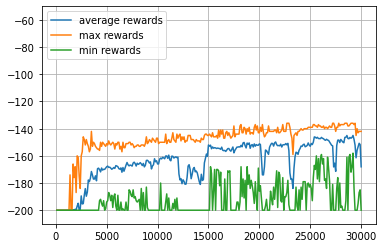

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:95: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:109: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


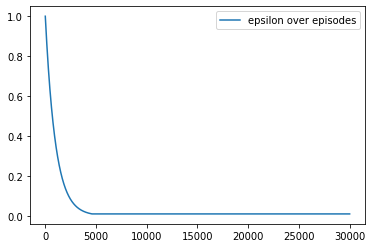

In [ ]:
import time
start_time = time.time()
run_start = datetime.now().strftime("%d_%m_%Y.%Hh%M")

for episode in tqdm(range(1, EPISODES + 1)):
    episode_reward = 0
    discrete_state = get_discrete_state(env.reset())
    done = False
    
    # leave in for visualization, not working in colab
    if episode % SHOW_EVERY == 0:
        render = True
    else:
        render = False

    # Run game until done
    while not done:
      # Decide whether to explore or exploit, epsilon decays as episodes progress, more likely to exploit
      if np.random.random() > epsilon:
            # Get action from Q table
            action = np.argmax(q_table[discrete_state])
      else:
            # Get random action
            action = np.random.randint(0, env.action_space.n)
      # Update game states
      new_state, reward, done, _ = env.step(action)
      new_discrete_state = get_discrete_state(new_state)
      episode_reward += reward
      
      if episode % SHOW_EVERY == 0:
            env.render()

      # If simulation did not end yet after last step - update Q table
      if not done:
        # Maximum possible Q value in next step (for new state)
        max_future_q = np.max(q_table[new_discrete_state])

        # Current Q value (for current state and performed action)
        current_q = q_table[discrete_state + (action,)]

        # And here's our equation for a new Q value for current state and action
        new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

        # Update Q table with new Q value
        q_table[discrete_state + (action,)] = new_q

      # Simulation ended (for any reason) - if goal position is achived - update Q value with reward directly
      elif new_state[0] >= env.goal_position:
        #q_table[discrete_state + (action,)] = 0
        #q_table[discrete_state + (action,)] = reward
        q_table[discrete_state + (action,)] = 1000


      discrete_state = new_discrete_state

    changed_eps['ep'].append(episode)
    changed_eps['eps'].append(epsilon)
    epsilon = max(min_epsilon, epsilon * epsilon_decay_value)
    #if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
    #  epsilon -= epsilon_decay_value

    #Append reward for statistics
    ep_rewards.append(episode_reward) 
    if not episode % STATS_EVERY:
      average_reward = sum(ep_rewards[-STATS_EVERY:])/STATS_EVERY
      aggr_ep_rewards['ep'].append(episode)
      aggr_ep_rewards['avg'].append(average_reward)
      aggr_ep_rewards['max'].append(max(ep_rewards[-STATS_EVERY:]))
      aggr_ep_rewards['min'].append(min(ep_rewards[-STATS_EVERY:]))
      print(f'Episode: {episode:>5d}, average reward: {average_reward:>4.1f}, current epsilon: {epsilon:>1.2f}')

    if episode % 100 == 0 and SAVE_RESULTS:
      model_save_name = f"{model_name}episode{episode}-qtable.npy"
      path = drive_path + model_save_name
      np.save(path, q_table)

env.close()

time_elapsed = time.time() - start_time
print("time elapsed: {:.2f}s".format(time_elapsed))

# Plot reward statistics over episodes
stats_plot =plt.figure()

plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label="average rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label="max rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label="min rewards")

plt.legend(loc=2)
plt.ylim(-210, -50)
plt.grid(True)
plt.show()

if SAVE_RESULTS:
  stats_plot.show()
  plot_save_name = f"mountain_car_run{model_name}_stats.png"
  plot_path = drive_path + plot_save_name
  stats_plot.savefig(plot_path, dpi=(250))
  #files.download(plot_path) 
  for key in aggr_ep_rewards.keys():
    stats_array = np.array(aggr_ep_rewards[key])
    stats_save_name = f"{model_name}-stats-{key}.npy"
    stats_path = drive_path + stats_save_name
    np.save(stats_path, stats_array)

  eps_plot = plt.figure()
  plt.plot(changed_eps["ep"], changed_eps["eps"], label="epsilon over episodes")
  plt.legend(loc=1)
  eps_plot.show()
  eps_plot_save_name = f"mountain_car_run{model_name}_eps.png"
  plot_path = drive_path + eps_plot_save_name
  eps_plot.savefig(plot_path, dpi=(250))
  
  for key in changed_eps.keys():
    stats_array = np.array(changed_eps[key])
    stats_save_name = f"{model_name}-epsilon-{key}.npy"
    stats_path = drive_path + stats_save_name
    np.save(stats_path, stats_array)


In [ ]:
# Load a model and check how it performs
load_previous_model = False
if load_previous_model:
  root_dir = "/content/gdrive/My Drive/Colab Notebooks/"
  model_path = root_dir + "Mountain run 4/Mountain run 4_a0.5_23_03_2020.23h57-episode10000-qtable.npy"
  q_table = np.load(model_path)

In [ ]:
env = wrap_env(gym.make("MountainCar-v0"))

EPISODES = 1
for episode in range(EPISODES):
    episode_reward = 0
    discrete_state = get_discrete_state(env.reset())
    done = False
    render = True

    # Run game until done
    while not done:
      # Decide whether to explore or exploit, epsilon decays as episodes progress, more likely to exploit
      action = np.argmax(q_table[discrete_state])
      # Update game states
      new_state, reward, done, _ = env.step(action)
      new_discrete_state = get_discrete_state(new_state)
      env.render()
      discrete_state = new_discrete_state

env.close()
show_video()

In [ ]:
import gym
import os
import random
import numpy as np
from statistics import mean


class MountainCar:
    def __init__(self, epsilon, alpha, gamma):
        self.system = "OS X"
        self.env = wrap_env(gym.make('MountainCar-v0'))
        self.action_space = self.env.action_space.n  # 0 is push left, 1 is  no push and 2 is push right
        self.observation_space = self.env.observation_space  # 0 is position [-1.2 - 0.6], 1 is velocity [-0.07 - 0.07]

        self.epsilon = epsilon  # probability of choosing a random action
        self.alpha = alpha  # learning rate
        self.gamma = gamma  # discount rate

        self.velocity_obs = [i / 100 for i in range(-7, 8, 1)]
        self.pos_obs = [i / 10 for i in range(-12, 7, 1)]
        obs_size = len(self.velocity_obs) * len(self.pos_obs)
        self.path = "/content/gdrive/My Drive/Colab Notebooks/"  # Desktop file path

        try:
            self.Q = np.load(self.path + ".npy")
        except FileNotFoundError:
            self.Q = np.zeros([obs_size, self.action_space])  # Initialize Q values

    def saveQ(self, path):  # save Q values
        np.save(path + ".npy", self.Q)

    def get_Q_index(self, state):
        for i in range(len(self.pos_obs)):
            # Position
            if self.pos_obs[i] <= state[0] < self.pos_obs[i + 1]:
                # Velocity
                for j in range(len(self.velocity_obs)):
                    if self.velocity_obs[j] <= state[1] < self.velocity_obs[j + 1]:
                        return len(self.velocity_obs) * i + j  # row we need in Q

    def learn(self, episodes, until_solved, rendering):

        print("Learning MountainCar-v0 model with {} episodes ".format(episodes))
        print("Learning  model until solved status: {}\n".format(until_solved))

        global_max_score = -1e10
        global_max_height = -1e10
        episodes_to_solve = 0
        self.env.seed(0)
        scores = []
        for i in range(1, episodes):
            obs = self.env.reset()
            state = self.get_Q_index(obs)
            done = False
            total_score = 0
            max_height = -1e10
            step = 0
            while not done:
                step += 1
                self.env.render() if rendering else 0  # picture
                if random.uniform(0, 1) < self.epsilon:  # e-greedy policy
                    action = self.env.action_space.sample()
                else:
                    action = np.argmax(self.Q[state])

                next_obs, reward, done, info = self.env.step(action)
                modified_reward = reward + self.gamma * abs(next_obs[1]) - abs(obs[1])  # reward based on potentials
                next_state = self.get_Q_index(next_obs)

                # update Q
                self.Q[state, action] = (1 - self.alpha) * self.Q[state, action] + self.alpha * (
                        modified_reward + self.gamma * np.max(self.Q[next_state]) - self.Q[state, action])
                state = next_state

                total_score += reward
                max_height = max(max_height, next_obs[0])

                # end if solved
                if done and step < 200:
                    if until_solved:
                        print("Solved in {} episodes".format(i))
                        self.env.close()
                        raise SystemExit()
                    if not episodes_to_solve:
                        episodes_to_solve = i
            scores.append(total_score)
            self.epsilon -= 5 * self.epsilon / episodes if self.epsilon > 0 else 0  # epsilon reduction
            global_max_score = max(global_max_score, total_score)
            global_max_height = max(global_max_height, max_height)
            if i % 5 == 0:
                print("Episode: {}".format(i))
                print(" Total score for episode {} : {}, Max height : {}".format(i, total_score, max_height))
                print(" GLOBAL MAXIMUMS: Max score : {}, Max height  : {}".format(global_max_score, global_max_height))
                print('-' * 150)
                self.saveQ(self.path)

        print("Training finished\n")
        solve_status = "Solved in {} episodes".format(episodes_to_solve) if global_max_height >= 0.5 else "Not Solved"
        print("Max score: {} ({} : mean), Max height: {}, Solve status : {}".format(global_max_score, int(mean(scores)),
                                                                                    global_max_height,
                                                                                    solve_status))
        self.env.close()


if __name__ == '__main__':
    episode_number = 100  # number of episodes
    learn_until_solved = False  # stop if solved
    rendering = True  # picture
    epsilon = 0.1  # probability of choosing a random action
    alpha = 0.5  # learning rate
    gamma = 0.8  # discount rate
    MountainCar(epsilon, alpha, gamma).learn(episode_number, learn_until_solved, rendering)


Learning MountainCar-v0 model with 100 episodes 
Learning  model until solved status: False

Episode: 5
 Total score for episode 5 : -184.0, Max height : 0.5168809399938525
 GLOBAL MAXIMUMS: Max score : -164.0, Max height  : 0.5234784996285066
------------------------------------------------------------------------------------------------------------------------------------------------------
Episode: 10
 Total score for episode 10 : -200.0, Max height : 0.21404480666549994
 GLOBAL MAXIMUMS: Max score : -164.0, Max height  : 0.5327335251169231
------------------------------------------------------------------------------------------------------------------------------------------------------
Episode: 15
 Total score for episode 15 : -167.0, Max height : 0.5250681647603543
 GLOBAL MAXIMUMS: Max score : -164.0, Max height  : 0.5327335251169231
---------------------------------------------------------------------------------------------------------------------------------------------------


  0%|          | 0/5000 [00:00<?, ?it/s]

Q Shape =  (30, 20, 3)



100%|██████████| 5000/5000 [01:26<00:00, 58.09it/s]


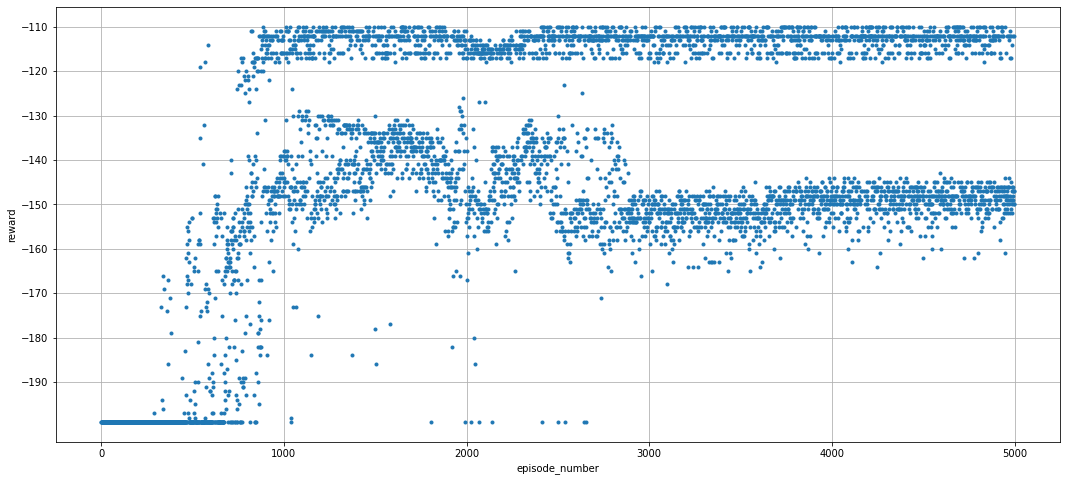

In [ ]:
class State:
    def __init__(self):
        self.pos = None
        self.vel = None

class Agent:
    def __init__(self, env):
        self.velocityLimit = np.array([env.observation_space.low[1], env.observation_space.high[1]])
        self.positionLimit = np.array([env.observation_space.low[0], env.observation_space.high[0]])
        self.velocityStep, self.positionStep = 0.005, 0.1
        self.velocitySpace = np.arange(self.velocityLimit[0], self.velocityLimit[1] 
                                       + self.velocityStep, self.velocityStep)
        self.positionSpace = np.arange(self.positionLimit[0], self.positionLimit[1] 
                                       + self.positionStep, self.positionStep)
        self.m, self.n, self.n_action = len(self.velocitySpace), len(self.positionSpace), 3
        self.Q = np.full(shape = (self.m, self.n, 3),
                                       fill_value = 0.0, dtype = np.float32)
        self.collectiveRecord = []
        self.success = []
        
    def getActionValueIndex(self, state):
        posOffset = state[0] - self.positionLimit[0]
        velOffset = state[1] - self.velocityLimit[0]
        posInd = posOffset // self.positionStep
        velInd = velOffset // self.velocityStep
        
        return np.array([velInd, posInd], dtype= np.int)
  
    def getAction(self, state):
        ind = self.getActionValueIndex(state, 0)
        p = self.Policy[ind[0], ind[1], :]
        action = np.random.choice([0, 1, 2], size = 1, p = p)
        return action[0]

env = wrap_env(gym.make('MountainCar-v0'))
agent = Agent(env)
env.seed(0)
print("Q Shape = ",agent.Q.shape)

eps = 0.8
changed_eps= []
changes_alpha= []
alpha = 0.2
LAMBDA = 0.8
alphaDecay = 0.999
epsDecay = 0.995
agent.e = np.zeros(shape = (agent.m, agent.n, 3))
Finish = False
numEpisodes = 5000
for i_eps in tqdm(range(1, numEpisodes + 1)):
    state = env.reset()
    agent.e[:, :, :] = 0
    gamma = 1.0
    ind = agent.getActionValueIndex(state)
    if np.random.random() < 1 - eps:
        action = np.argmax(agent.Q[ind[0], ind[1], :]) 
    else:
        action = np.random.randint(0, 3)
    
    for t in range(201):
        ind = agent.getActionValueIndex(state)
        nextState, reward, done, info = env.step(action)
        nextInd = agent.getActionValueIndex(nextState)
        
        if np.random.random() < 1 - eps:
            nextAction = np.argmax(agent.Q[nextInd[0], nextInd[1], :]) 
        else: 
            nextAction = np.random.randint(0, 3)
    
        delta = reward + gamma * agent.Q[nextInd[0],nextInd[1],nextAction] - agent.Q[ind[0],ind[1],action]
        agent.e[ind[0],ind[1],action] += 1
 
        agent.Q = np.add(agent.Q, np.multiply(alpha * delta, agent.e))
        agent.e = np.multiply(gamma * LAMBDA, agent.e)
        
        if done: 
            if t < 199:
                agent.success.append((i_eps, t))
            agent.collectiveRecord.append(-t)
            eps = max(0.0, eps * epsDecay)
            alpha = max(0.0, alpha * alphaDecay)
            break
        state = nextState
        action = nextAction
# env.close()


fig, ax = plt.subplots(figsize = (18, 8))
plt.plot(agent.collectiveRecord[:],'.')
plt.yticks(range(-110, -200, -10))
plt.ylabel("reward")
plt.xlabel("episode_number")
plt.grid()
plt.show()

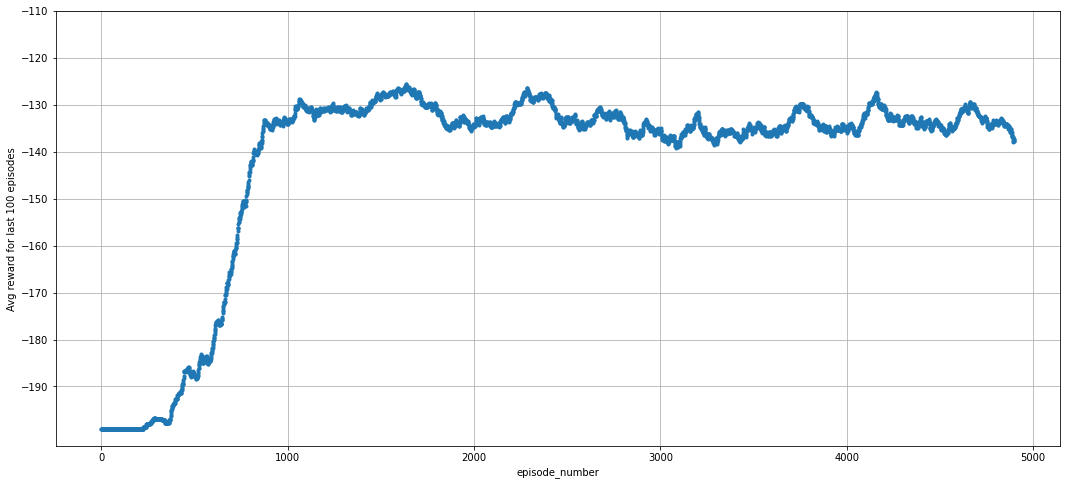

In [ ]:

avgReward = []
for i in range(100, numEpisodes):
    avgReward.append(np.mean(agent.collectiveRecord[i - 100:i]))
fig, ax = plt.subplots(figsize = (18, 8))
plt.plot(avgReward, '.')
plt.yticks(range(-110, -200, -10))
plt.xticks(changed_eps)
plt.ylabel("Avg reward for last 100 episodes")
plt.xlabel("episode_number")
plt.grid()
plt.show()

In [ ]:
show_video()